# Plant Disease Prediction - Image Classifier Using CNN

#### Seeding for reproducibility

In [3]:
import torch
import random
import numpy as np

# Set seeds for reproducibility
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

#### Importing the dependencies

In [39]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

#### Data Curation

Upload the kaggle.json file

In [3]:
%pip install kaggle

  Using cached kaggle-1.6.14-py3-none-any.whl
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/163.0 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.0 kB ? eta -:--:--
   ------------------------------------- -- 153.6/163.0 kB ? eta -:--:--
   ---------------------------------------- 163.0/163.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
   ------------------------------------- -- 153.6/162.8 kB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 162.8/162.8 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/64.9 kB ? eta -:--:--
   ------------------------------------- -- 61.4/64.9 kB ? eta -:--:--
   ---------------------------------------- 64.9/64.9 kB 868.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/121.4 kB ? eta -:--:--
   ------------------------------------- -- 112.6/121.4 kB ? eta -:--:--



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
kaggle_credentails = json.load(open("kaggle.json"))

In [6]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset


  0%|          | 0.00/2.04G [00:00<?, ?B/s]
  0%|          | 1.00M/2.04G [00:01<51:36, 707kB/s]
  0%|          | 2.00M/2.04G [00:02<38:21, 950kB/s]
  0%|          | 3.00M/2.04G [00:03<34:29, 1.06MB/s]
  0%|          | 4.00M/2.04G [00:04<32:44, 1.11MB/s]
  0%|          | 5.00M/2.04G [00:04<31:45, 1.15MB/s]
  0%|          | 6.00M/2.04G [00:05<31:09, 1.17MB/s]
  0%|          | 7.00M/2.04G [00:06<30:46, 1.18MB/s]
  0%|          | 8.00M/2.04G [00:07<30:29, 1.19MB/s]
  0%|          | 9.00M/2.04G [00:08<30:21, 1.20MB/s]
  0%|          | 10.0M/2.04G [00:09<30:12, 1.20MB/s]
  1%|          | 11.0M/2.04G [00:10<30:04, 1.21MB/s]
  1%|          | 12.0M/2.04G [00:10<30:02, 1.21MB/s]
  1%|          | 13.0M/2.04G [00:11<29:58, 1.21MB/s]
  1%|          | 14.0M/2.04G [00:12<29:57, 1.21MB/s]
  1%|          | 15.0M/2.04G [00:13<29:54, 1.21MB/s]
  1%|          | 16.0M/2.04G [00:14<29:54, 1.21MB/s]
  1%|          | 17.0M/2.04G [00:15<29:54, 1.21MB/s]
  1%|          | 18.0M/2.04G [00:16<29:50, 1.21MB/s]
  1


License(s): CC-BY-NC-SA-4.0



In [7]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is BAE7-516A

 Directory of c:\Users\yadav\OneDrive\Desktop\Capstone Project

13-07-2024  19:50    <DIR>          .
13-07-2024  19:50    <DIR>          ..
13-07-2024  19:50           401,821 image_classifier.ipynb
12-07-2024  11:53                66 kaggle.json
12-07-2024  12:48    <DIR>          plantvillage dataset
28-10-2019  12:25     2,189,386,419 plantvillage-dataset.zip
13-07-2024  19:57             2,986 test.py
               4 File(s)  2,189,791,292 bytes
               3 Dir(s)  17,270,857,728 bytes free


In [10]:
# Unzip the downloaded dataset
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [8]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']
38
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy']


Therefore, Number of classes is 38

In [9]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['00e00912-bf75-4cf8-8b7d-ad64b73bea5f___Mt.N.V_HL 6067.JPG', '0163a6aa-fbf8-47c5-965f-59b6efe8bfe5___Mt.N.V_HL 6103.JPG', '0294ca65-4c29-44be-af28-501df9f715e8___Mt.N.V_HL 6176.JPG', '02f95acb-5d92-4f2a-b7ec-3af8709ee7c9___Mt.N.V_HL 9078.JPG', '03027791-26bb-4c46-960e-8df76e27042c___Mt.N.V_HL 6070.JPG']


#### Data Preprocessing

In [10]:
# Dataset Path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


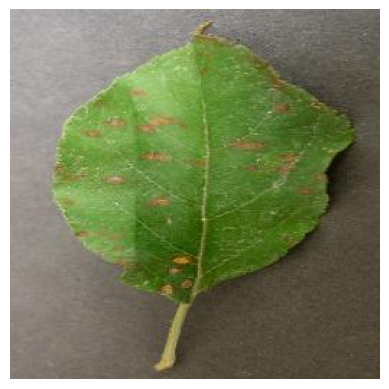

In [11]:
image_path = 'plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  
plt.show()

In [12]:
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [18]:
# Image Parameters
img_size = 224
batch_size = 32
num_workers = 4

In [14]:

# Define Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225])
])

In [15]:
# Load Dataset
dataset = datasets.ImageFolder(base_dir, transform=transform)

In [16]:
# Split Dataset into Train and Validation
val_size = int(0.2 * len(dataset))
train_size = len(dataset) - val_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

In [19]:
# Data Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

In [20]:
# Model Definition
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * (img_size // 4) * (img_size // 4), 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * (img_size // 4) * (img_size // 4))
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [21]:
# Initialize Model
num_classes = len(train_loader.dataset.dataset.classes)
model = SimpleCNN(num_classes)

In [22]:
# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [23]:
# Training Function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=5):
    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(correct / total)

        model.eval()
        running_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(running_loss / len(val_loader))
        val_accuracies.append(correct / total)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Train Accuracy: {train_accuracies[-1]:.4f}, '
              f'Val Loss: {val_losses[-1]:.4f}, '
              f'Val Accuracy: {val_accuracies[-1]:.4f}')

    # Save training history
    history = {
        "train_losses": train_losses,
        "val_losses": val_losses,
        "train_accuracies": train_accuracies,
        "val_accuracies": val_accuracies
    }
    with open('Json_Files/training_history.json', 'w') as f:
        json.dump(history, f)

    return train_losses, val_losses, train_accuracies, val_accuracies

In [24]:
# Train the Model
train_losses, val_losses, train_accuracies, val_accuracies = train_model(
    model, train_loader, val_loader, criterion, optimizer, num_epochs=5
)

Epoch 1/5, Train Loss: 1.2654, Train Accuracy: 0.6436, Val Loss: 0.6515, Val Accuracy: 0.7964
Epoch 2/5, Train Loss: 0.4985, Train Accuracy: 0.8438, Val Loss: 0.5646, Val Accuracy: 0.8322
Epoch 3/5, Train Loss: 0.2797, Train Accuracy: 0.9119, Val Loss: 0.4917, Val Accuracy: 0.8547
Epoch 4/5, Train Loss: 0.1505, Train Accuracy: 0.9505, Val Loss: 0.5135, Val Accuracy: 0.8631
Epoch 5/5, Train Loss: 0.1029, Train Accuracy: 0.9662, Val Loss: 0.5645, Val Accuracy: 0.8687


In [26]:
# Save the trained model
torch.save(model.state_dict(), 'Model/plant_disease_prediction_model.pth')

In [42]:
# Evaluate the model on the training set
model.eval()
correct, total = 0, 0
all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in train_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

train_acc = 100 * correct / total
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
print(f'Training accuracy: {train_acc:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Training accuracy: 98.42%, Precision: 0.98, Recall: 0.98, F1 Score: 0.98


In [41]:
# Evaluate the model on the validation set
model.eval()
correct, total = 0, 0
all_labels, all_preds = [], []
with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

val_acc = 100 * correct / total
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')
print(f'Validation accuracy: {val_acc:.2f}%, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

Validation accuracy: 86.87%, Precision: 0.84, Recall: 0.82, F1 Score: 0.83


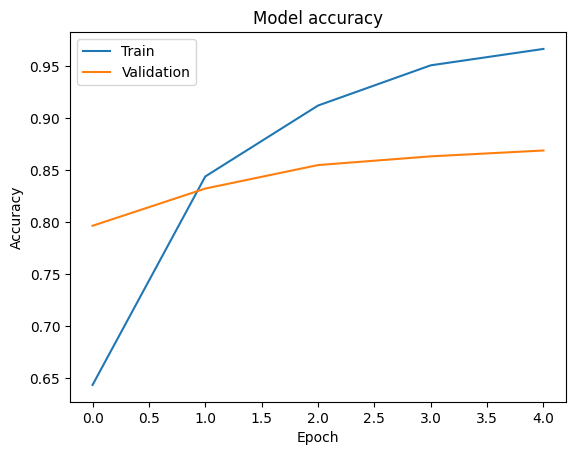

In [43]:
# Plot training & validation accuracy values
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

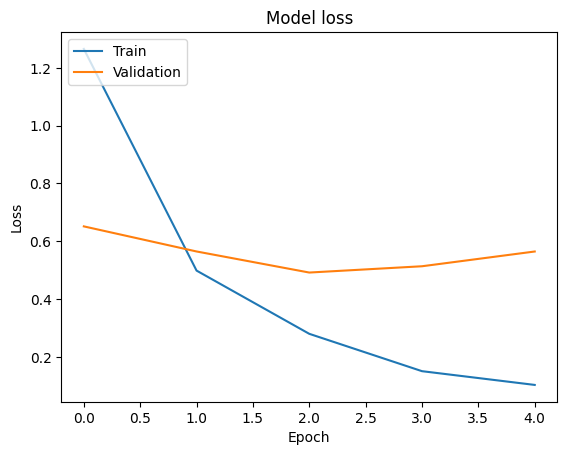

In [28]:
# Plot training & validation loss values
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, transform):
    img = Image.open(image_path)
    img = transform(img)
    img = img.unsqueeze(0)  # Add batch dimension
    return img

In [30]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, transform, class_indices):
    model.eval()
    img = load_and_preprocess_image(image_path, transform).to(device)
    with torch.no_grad():
        outputs = model(img)
        _, predicted = torch.max(outputs, 1)
    predicted_class_index = predicted.item()
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [31]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_loader.dataset.dataset.class_to_idx.items()}
print(class_indices)

{0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust', 3: 'Apple___healthy', 4: 'Blueberry___healthy', 5: 'Cherry_(including_sour)___Powdery_mildew', 6: 'Cherry_(including_sour)___healthy', 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 8: 'Corn_(maize)___Common_rust_', 9: 'Corn_(maize)___Northern_Leaf_Blight', 10: 'Corn_(maize)___healthy', 11: 'Grape___Black_rot', 12: 'Grape___Esca_(Black_Measles)', 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 14: 'Grape___healthy', 15: 'Orange___Haunglongbing_(Citrus_greening)', 16: 'Peach___Bacterial_spot', 17: 'Peach___healthy', 18: 'Pepper,_bell___Bacterial_spot', 19: 'Pepper,_bell___healthy', 20: 'Potato___Early_blight', 21: 'Potato___Late_blight', 22: 'Potato___healthy', 23: 'Raspberry___healthy', 24: 'Soybean___healthy', 25: 'Squash___Powdery_mildew', 26: 'Strawberry___Leaf_scorch', 27: 'Strawberry___healthy', 28: 'Tomato___Bacterial_spot', 29: 'Tomato___Early_blight', 30: 'Tomato___Late_blight', 31: 'To

In [32]:
# Save the class names as a JSON file
json.dump(class_indices, open('Json_Files/class_indices.json', 'w'))

In [35]:
# Example Usage
image_path = 'test_images/test_apple_black_rot.JPG'
predicted_class_name = predict_image_class(model, image_path, transform, class_indices)

In [36]:
# Output the result
print("Predicted Class Name:", predicted_class_name)

Predicted Class Name: Apple___Black_rot
